# <font color='red'> 필요한 패키지 설정

In [0]:
from google.colab import drive
from datetime import datetime

import os
import pandas as pd

In [0]:
import numpy as np
import os
from collections import Counter
import sys
import pickle

# sys._enablelegacywindowsfsencoding()

## pandas version check

In [0]:
pd.__version__

'0.24.2'

In [0]:
# pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

# <font color='red'> 데이터 로딩

In [0]:
# 구글 드라이브 접근 권한 획득
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# 구글 드라이브 접근 확인하기
!ls -lt "/content/gdrive/My Drive/ML_basic/ML_basic_dataset"

total 5984646
drwx------ 2 root root       4096 Sep  8 07:34 model_data
drwx------ 2 root root       4096 Sep  8 07:32 variable_performance
drwx------ 2 root root       4096 Sep  8 07:25 univariate_statistics
-rw------- 1 root root 1441750553 Sep  8 06:41 loan_seg_sample_df.pkl
-rw------- 1 root root     265370 Sep  8 06:16 LCDataDictionary_modification_3.xlsx
-rw------- 1 root root 1441750553 Aug 31 02:05 loan_seg_df_3.pkl
-rw------- 1 root root  836188793 Jul 14 14:11 loan_seg_df_2.pkl
-rw------- 1 root root 1218773813 Jul 14 09:27 loan_seg_df_1.pkl
-rw------- 1 root root      40581 Jul 14 07:03 LCDataDictionary_modification_2.xlsx
-rw------- 1 root root      39139 Jul 13 16:27 LCDataDictionary_modification_1.xlsx
-rw------- 1 root root      33741 Jul 13 09:46 LCDataDictionary_modification.xlsx
-rw------- 1 root root      23594 Jul 13 09:01 LCDataDictionary.xlsx
-rw------- 1 root root 1189395649 Jun 30 12:21 loan.csv


In [0]:
# 피클파일 읽기
folder_path = r'/content/gdrive/My Drive/ML_basic/ML_basic_dataset'
pkl_fname = 'loan_seg_df_3.pkl'
pkl_fpath = folder_path + os.sep + pkl_fname
print('파일경로: ', pkl_fpath)
loan_seg_df = pd.read_pickle(pkl_fpath)
print('파일형태: ', loan_seg_df.shape)
loan_seg_df.head(2)

파일경로:  /content/gdrive/My Drive/ML_basic/ML_basic_dataset/loan_seg_df_3.pkl
파일형태:  (1962274, 95)


id member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
186                    4500         4500           4500.0   36 months   
269                   20000        20000          20000.0   60 months   

     int_rate  installment grade sub_grade              emp_title emp_length  \
186     11.31       147.99     B        B3  Accounts Examiner III  10+ years   
269     17.97       507.55     D        D1      Front office Lead    4 years   

    home_ownership  annual_inc verification_status   issue_d url desc  \
186           RENT     38500.0        Not Verified  Dec-2018            
269           RENT     57000.0        Not Verified  Dec-2018            

                purpose                    title zip_code addr_state    dti  \
186         credit_card  Credit card refinancing    786xx         TX   4.64   
269  debt_consolidation       Debt consolidation    981xx         WA  22.18   

     delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
186          0.0         Dec-2003             0.0                    25.0   
269          0.0         Apr-1995             0.0                     0.0   

     mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
186                     0.0      12.0      0.0       4472        15.3   
269                     0.0      10.0      0.0      33356        45.9   

     total_acc initial_list_status  policy_code application_type  \
186       25.0                   w            1       Individual   
269       16.0                   w            1       Individual   

     acc_now_delinq  open_acc_6m  open_act_il  open_il_12m  open_il_24m  \
186             0.0          2.0          1.0          1.0          1.0   
269             0.0          2.0          0.0          0.0          0.0   

     mths_since_rcnt_il  total_bal_il  il_util  open_rv_12m  open_rv_24m  \
186                 3.0       24665.0    100.0          3.0          7.0   
269                78.0           0.0      0.0          2.0          3.0   

     max_bal_bc  all_util  total_rev_hi_lim  inq_fi  total_cu_tl  \
186      3612.0      54.0           29200.0     0.0          3.0   
269     18416.0      46.0           72700.0     0.0          0.0   

     inq_last_12m  acc_open_past_24mths  avg_cur_bal  bc_open_to_buy  bc_util  \
186           3.0                   8.0       2428.0         10735.0     28.9   
269           0.0                   3.0       3336.0         32170.0     50.4   

     chargeoff_within_12_mths  mo_sin_old_il_acct  mo_sin_old_rev_tl_op  \
186                       0.0               180.0                  69.0   
269                       0.0                78.0                 284.0   

     mo_sin_rcnt_rev_tl_op  mo_sin_rcnt_tl  mort_acc  mths_since_recent_bc  \
186                    2.0             2.0       0.0                   2.0   
269                    5.0             5.0       1.0                  27.0   

     mths_since_recent_bc_dlq  mths_since_recent_inq  \
186                       0.0                    6.0   
269                       0.0                   17.0   

     mths_since_recent_revol_delinq  num_accts_ever_120_pd  num_actv_bc_tl  \
186                             0.0                    1.0             3.0   
269                             0.0                    0.0             4.0   

     num_actv_rev_tl  num_bc_sats  num_bc_tl  num_il_tl  num_op_rev_tl  \
186              5.0          5.0        6.0       10.0           11.0   
269              7.0          6.0        9.0        1.0           10.0   

     num_rev_accts  num_rev_tl_bal_gt_0  num_sats  num_tl_120dpd_2m  \
186           15.0                  5.0      12.0               0.0   
269           14.0                  7.0      10.0               0.0   

     num_tl_30dpd  num_tl_90g_dpd_24m  num_tl_op_past_12m  pct_tl_nvr_dlq  \
186           0.0                 0.0                 4.0            91.7   
269           0.0                 0.0                 2.0           

# 레코드10% 샘플링 

In [0]:
loan_seg_sample_df = loan_seg_df.sample(frac=0.1, replace=False, random_state=1)
loan_seg_sample_df.shape

(196227, 95)

# 컬럼 줄이기

## 정성적 판단

* 불필요한 컬럼 줄이기
  * 실행정보: 모두 삭제
  * 신청정보: id 등 사용불가 컬럼 삭제
  * 심사정보
    * 문자형 컬럼: 렌딩클럽 등급 > 샘플링 목적으로 남겨둠(모형 학습에는 사용하지 않음)
    * 숫자형 컬럼: 모두 사용

In [0]:
# 신청서정보(문자형)
target_col = ['Y',]

# 신청서정보(문자형)
candidate_cols_application_char = ['emp_title','home_ownership','emp_length',]

# 신청서정보(숫자형)
candidate_cols_application_num = ['annual_inc',]

# 심사정보(문자형)
reference_cols_screen_char = ['grade','sub_grade',]

# 심사정보(숫자형)
candidate_cols_screen_num = [
'mths_since_last_record',
'pub_rec',
'chargeoff_within_12_mths',
'pub_rec_bankruptcies',
'tax_liens',
'dti',
'open_acc',
'total_acc',
'avg_cur_bal',
'mo_sin_rcnt_tl',
'num_sats',
'num_tl_op_past_12m',
'tot_hi_cred_lim',
'total_bal_ex_mort',
'mo_sin_old_rev_tl_op',
'mo_sin_rcnt_rev_tl_op',
'num_op_rev_tl',
'revol_bal',
'max_bal_bc',
'num_rev_accts',
'revol_util',
'total_rev_hi_lim',
'delinq_2yrs',
'mths_since_last_delinq',
'acc_now_delinq',
'mths_since_recent_revol_delinq',
'num_accts_ever_120_pd',
'num_tl_120dpd_2m',
'num_tl_30dpd',
'num_tl_90g_dpd_24m',
'inq_last_6mths',
'inq_fi',
'inq_last_12m',
'mths_since_recent_inq',
'mort_acc',
'bc_open_to_buy',
'mths_since_recent_bc',
'num_actv_bc_tl',
'num_bc_sats',
'num_bc_tl',
'mths_since_recent_bc_dlq',
'bc_util',
'percent_bc_gt_75',
'total_bc_limit',
'open_act_il',
'total_cu_tl',
'num_actv_rev_tl',
'num_rev_tl_bal_gt_0',
'open_acc_6m',
'open_rv_12m',
'open_rv_24m',
'acc_open_past_24mths',
'all_util',
'num_il_tl',
'open_il_12m',
'open_il_24m',
'mths_since_rcnt_il',
'mo_sin_old_il_acct',
'total_bal_il',
'il_util',
'total_il_high_credit_limit',
'pct_tl_nvr_dlq',]



In [0]:
total_cols = target_col + candidate_cols_application_char + candidate_cols_application_num + reference_cols_screen_char + candidate_cols_screen_num
loan_seg_sample_df = loan_seg_sample_df[total_cols].copy()
print(loan_seg_sample_df.shape)

(196227, 69)


In [0]:
# 현재까지 작업한 내용 피클파일로 저장
folder_path = r'/content/gdrive/My Drive/ML_basic/ML_basic_dataset'
pkl_fname = 'loan_seg_sample_df.pkl'
pkl_fpath = folder_path + os.sep + pkl_fname
loan_seg_df.to_pickle(pkl_fpath)

## 결측치 많은 컬럼 삭제
* 문자열컬럼: 결측치가 50%이상인 컬럼 삭제

In [0]:
char_cols = candidate_cols_application_char 
num_cols = candidate_cols_application_num + candidate_cols_screen_num

In [0]:
# 공란을 np.nan(NULL) 입력
loan_seg_sample_df[loan_seg_sample_df==''] = np.nan

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [0]:
null_cnt_list = loan_seg_sample_df.isnull().sum().values
null_cnt_list

array([    0, 12295,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0])

In [0]:

null_cnt_df = pd.DataFrame({'col': loan_seg_sample_df.columns, 'null_cnt': null_cnt_list})
null_cnt_df

col  null_cnt
0                            Y         0
1                    emp_title     12295
2               home_ownership         0
3                   emp_length         0
4                   annual_inc         0
5                        grade         0
6                    sub_grade         0
7       mths_since_last_record         0
8                      pub_rec         0
9     chargeoff_within_12_mths         0
10        pub_rec_bankruptcies         0
11                   tax_liens         0
12                         dti         0
13                    open_acc         0
14                   total_acc         0
15                 avg_cur_bal         0
16              mo_sin_rcnt_tl         0
17                    num_sats         0
18          num_tl_op_past_12m         0
19             tot_hi_cred_lim         0
20           total_bal_ex_mort         0
21        mo_sin_old_rev_tl_op         0
22       mo_sin_rcnt_rev_tl_op         0
23               num_op_rev_tl         0
24                   revol_bal         0
25                  max_bal_bc         0
26               num_rev_accts         0
27                  revol_util         0
28            total_rev_hi_lim         0
29                 delinq_2yrs         0
..                         ...       ...
39                inq_last_12m         0
40       mths_since_recent_inq         0
41                    mort_acc         0
42              bc_open_to_buy         0
43        mths_since_recent_bc         0
44              num_actv_bc_tl         0
45                 num_bc_sats         0
46                   num_bc_tl         0
47    mths_since_recent_bc_dlq         0
48                     bc_util         0
49            percent_bc_gt_75         0
50              total_bc_limit         0
51                 open_act_il         0
52                 total_cu_tl         0
53             num_actv_rev_tl         0
54         num_rev_tl_bal_gt_0         0
55                 open_acc_6m         0
56                 open_rv_12m         0
57                 open_rv_24m         0
58        acc_open_past_24mths         0
59                    all_util         0
60                   num_il_tl         0
61                 open_il_12m         0
62                 open_il_24m         0
63          mths_since_rcnt_il         0
64          mo_sin_old_il_acct         0
65                total_bal_il         0
66                     il_util         0
67  total_il_high_credit_limit         0
68              pct_tl_nvr_dlq         0

[69 rows x 2 columns]

In [0]:

null_cnt_df = null_cnt_df[null_cnt_df['null_cnt'] > 0].copy()
null_cnt_df
# 삭제할 컬럼 없음 확인

col  null_cnt
1  emp_title     12295

In [0]:
null_count_dict = dict()
for col in list(loan_seg_sample_df.columns):
  null_count = sum(loan_seg_sample_df[col].isnull().values)
  null_count_dict[col] = null_count

In [0]:
# np.nan을 문자열 'NULL'로 변환
loan_seg_sample_df = loan_seg_sample_df.fillna('NULL')

## 문자열 중 카테고리가 너무 많은 경우 삭제

In [0]:
# 문자열 컬럼 살펴보기
char_cols_df = loan_seg_sample_df[char_cols].copy()
char_cols_df.head()

emp_title home_ownership emp_length
1446534              Fleet Mech. 3            OWN    4 years
1431093                Ramp Agent        MORTGAGE  10+ years
397590      Global sales director            RENT   < 1 year
312890                     Manager       MORTGAGE  10+ years
2050256  assistant general manager           RENT   < 1 year

In [0]:
# 문자열 컬럼별 카테고리 수 확인
for col in char_cols:
  print(col, ' num of classes > ', len(set(char_cols_df[col].values)))

emp_title  num of classes >  74290
home_ownership  num of classes >  6
emp_length  num of classes >  12


In [0]:
# 직급 컬럼 삭제
print('before: ', loan_seg_sample_df.shape)
loan_seg_sample_df.drop(['emp_title'], axis = 1, inplace=True)
print('after: ', loan_seg_sample_df.shape)

before:  (196227, 69)
after:  (196227, 68)


In [0]:
print(char_cols)
char_cols.remove('emp_title')
print(char_cols)

['emp_title', 'home_ownership', 'emp_length']
['home_ownership', 'emp_length']


# trn/val/tst 데이터 나누기

## 렌딩클럽 등급별 구성비 불량율 확인

In [0]:
# 등급별 구성비 및 불량율 확인
target_var = 'grade'
temp_df = loan_seg_sample_df[[target_var, 'Y']].copy()
grp_df = temp_df.groupby([target_var], as_index=False).agg(
    {
        'Y': [('total_cnt', 'count'), ('bad_cnt', 'sum'), ]
    }
)
grp_df.columns = [target_var, 'total_cnt', 'bad_cnt']

# 구성비/불량율 계산
grp_df['ratio'] = grp_df['total_cnt']/loan_seg_sample_df.shape[0]
grp_df['bad_rate'] = grp_df['bad_cnt']/grp_df['total_cnt']
grp_df.sort_values(['bad_rate'])
grp_df

grade  total_cnt  bad_cnt     ratio  bad_rate
0     A      35496     1576  0.180893  0.044399
1     B      58038     5584  0.295770  0.096213
2     C      57134     9077  0.291163  0.158872
3     D      28256     6546  0.143996  0.231668
4     E      12205     3737  0.062198  0.306186
5     F       3927     1500  0.020013  0.381971
6     G       1171      504  0.005968  0.430401

(0, 0.5)

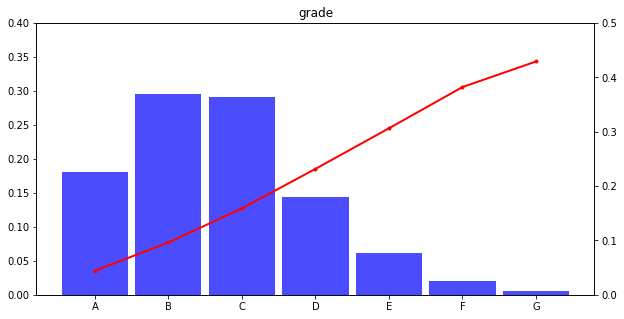

In [0]:
# matplotlib 임포트
import matplotlib.pyplot as plt

# 캔버스 생성
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 5))
fig.patch.set_facecolor('xkcd:white')

# x축 값 생성
xs_tmp = list(grp_df[target_var].values)
xs = list()
for x in xs_tmp:
  xs.append(str(x))

# 구성비 그래프 추가  
axes.bar(xs, height=grp_df['ratio'].values, color = 'b', width=0.9, align='center', alpha=0.7, )
axes.tick_params(labelrotation=0)
axes.set_ylim([0, 0.4])
axes.set_title(target_var)

# 불량율 그래프 추가
ax_twin = axes.twinx()
ax_twin.plot(xs, grp_df['bad_rate'].values, color = 'r', marker='.', linestyle='-', linewidth=2)
ax_twin.set_ylim([0, 0.5])

## 층화 추출
* 층화 변수: grade, Y 기준 
* trn:val:tst = 6:2:2

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
df_train, df_non_train = train_test_split(loan_seg_sample_df, test_size = 0.4, stratify=loan_seg_sample_df[['Y', 'grade']])

In [0]:
df_valid, df_test = train_test_split(df_non_train, test_size = 0.5, stratify=df_non_train[['Y', 'grade']])

### split check

In [0]:
# 레코드 수 확인
df_train.shape[0]+df_valid.shape[0]+df_test.shape[0] == loan_seg_sample_df.shape[0]

True

In [0]:
# exclusive 확인
print(set(df_train.index).intersection(df_valid.index))
print(set(df_train.index).intersection(df_test.index))
print(set(df_valid.index).intersection(df_test.index))

set()
set()
set()


### [Y, grade] 구성비 확인

In [0]:
grp_df_dict = dict()
grp_df_dict['total_data'] = grp_df

target_var = 'grade'
for split, df in zip(['train_data', 'valid_data', 'test_data'], [df_train, df_valid, df_test]):
  temp_df = df[[target_var, 'Y']].copy()
  grp_df = temp_df.groupby([target_var], as_index=False).agg(
      {
          'Y': [('total_cnt', 'count'), ('bad_cnt', 'sum'), ]
      }
  )
  grp_df.columns = [target_var, 'total_cnt', 'bad_cnt']

  # 구성비/불량율 계산
  grp_df['ratio'] = grp_df['total_cnt']/df.shape[0]
  grp_df['bad_rate'] = grp_df['bad_cnt']/grp_df['total_cnt']
  grp_df_dict[split] = grp_df

In [0]:
# 캔버스 생성
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(20, 8))
fig.patch.set_facecolor('xkcd:white')

subplot_cnt = 0
for split, grp_df in grp_df_dict.items():
  # x축 값 생성
  xs_tmp = list(grp_df[target_var].values)
  xs = list()
  for x in xs_tmp:
    xs.append(str(x))
    
  # subplot index 생성
  row_idx = int(subplot_cnt/2)
  col_idx = subplot_cnt % 2
  subplot_cnt = subplot_cnt + 1    

  # 구성비 그래프 추가  
  axes[row_idx, col_idx].bar(xs, height=grp_df['ratio'].values, color = 'b', width=0.9, align='center', alpha=0.7, )
  axes[row_idx, col_idx].tick_params(labelrotation=0)
  axes[row_idx, col_idx].set_ylim([0, 0.4])
  axes[row_idx, col_idx].set_title(split + ': ' + str(sum(grp_df['total_cnt'].values)))

  # 불량율 그래프 추가
  ax_twin = axes[row_idx, col_idx].twinx()
  ax_twin.plot(xs, grp_df['bad_rate'].values, color = 'r', marker='.', linestyle='-', linewidth=2)
  ax_twin.set_ylim([0, 0.5])

## X, Y 분리
* 층화추출을 위해 유지했던 등급 변수 삭제

In [0]:
drop_cols = reference_cols_screen_char + ['Y']

X_train_df = df_train.drop(drop_cols, axis = 1)
y_train_df = df_train[['Y']]

X_valid_df = df_valid.drop(drop_cols, axis = 1)
y_valid_df = df_valid[['Y']]

X_test_df = df_test.drop(drop_cols, axis = 1)
y_test_df = df_test[['Y']]

In [0]:
X_train_df.shape

(117736, 65)

# 단변량 분석(Univariate Analysis)
* Fine classing

### df type check

In [0]:
print(len(char_cols))
print(len(num_cols))
print(X_train_df.shape)

cate_cols = char_cols

2
63
(117736, 65)


## Numeric 변수에서 분산이 0인 경우 제거

In [0]:
# See the variance
std = X_train_df[num_cols].apply(np.std)

In [0]:
variance_zero_col = std[std==0].index
variance_zero_col
# 분산 0인 컬럼 없음

Index([], dtype='object')

## Binning

In [0]:
# binned df 생성
X_binned_train_df = X_train_df.copy()
X_binned_valid_df = X_valid_df.copy()
X_binned_test_df = X_test_df.copy()

In [0]:
import math

In [0]:
# Binning by 5%
q = list(np.linspace(0, 1, 21))

In [0]:
q

[0.0,
 0.05,
 0.1,
 0.15000000000000002,
 0.2,
 0.25,
 0.30000000000000004,
 0.35000000000000003,
 0.4,
 0.45,
 0.5,
 0.55,
 0.6000000000000001,
 0.65,
 0.7000000000000001,
 0.75,
 0.8,
 0.8500000000000001,
 0.9,
 0.9500000000000001,
 1.0]

## Numerical cols -> Fine classing

In [0]:
idx = 0
for variable in num_cols:

    # Fine classing
    X_binned_train_df[variable] = pd.qcut(x=X_train_df[variable], q=q, duplicates='drop')

    # Minimum value의 left : -Inf / Max value의 right : Inf
    max_interval, min_interval, change_max_interval, change_min_interval = [], [], [], []
    
    max_interval = X_binned_train_df[variable].max()
    change_max_interval = pd.Interval(left = max_interval.left, right = math.inf)

    min_interval = X_binned_train_df[variable].min()
    change_min_interval = pd.Interval(left = -math.inf, right = min_interval.right)
    
    # change min/max value
    X_binned_train_df[variable] = np.where(X_binned_train_df[variable] == max_interval,
                                      change_max_interval,
                                      X_binned_train_df[variable])

    X_binned_train_df[variable] = np.where(X_binned_train_df[variable] == min_interval,
                                      change_min_interval,
                                      X_binned_train_df[variable])
    
    X_binned_train_df[variable] = X_binned_train_df[variable].astype('category')
    bin_points = []
    bin_points = X_binned_train_df[variable].cat.categories

    X_binned_valid_df[variable] = pd.cut(x=X_binned_valid_df[variable], bins=bin_points, duplicates='drop')
    X_binned_test_df[variable] = pd.cut(x=X_binned_test_df[variable], bins=bin_points, duplicates='drop')
    
    idx += 1
    print(idx, '/', len(num_cols))

1 / 63
2 / 63
3 / 63
4 / 63
5 / 63
6 / 63
7 / 63
8 / 63
9 / 63
10 / 63
11 / 63
12 / 63
13 / 63
14 / 63
15 / 63
16 / 63
17 / 63
18 / 63
19 / 63
20 / 63
21 / 63
22 / 63
23 / 63
24 / 63
25 / 63
26 / 63
27 / 63
28 / 63
29 / 63
30 / 63
31 / 63
32 / 63
33 / 63
34 / 63
35 / 63
36 / 63
37 / 63
38 / 63
39 / 63
40 / 63
41 / 63
42 / 63
43 / 63
44 / 63
45 / 63
46 / 63
47 / 63
48 / 63
49 / 63
50 / 63
51 / 63
52 / 63
53 / 63
54 / 63
55 / 63
56 / 63
57 / 63
58 / 63
59 / 63
60 / 63
61 / 63
62 / 63
63 / 63


In [0]:
X_binned_train_df.head()

home_ownership emp_length          annual_inc mths_since_last_record  \
837878        MORTGAGE    2 years  (35000.0, 40000.0]           (-inf, 30.0]   
1514793       MORTGAGE        n/a  (75000.0, 80000.0]           (64.0, 86.0]   
1008721       MORTGAGE    8 years  (55000.0, 58500.0]           (-inf, 30.0]   
661505            RENT     1 year  (55000.0, 58500.0]           (-inf, 30.0]   
1387661       MORTGAGE   < 1 year  (86000.0, 94000.0]           (-inf, 30.0]   

             pub_rec chargeoff_within_12_mths pub_rec_bankruptcies  \
837878   (-inf, 1.0]            (-0.001, inf]          (-inf, 1.0]   
1514793  (-inf, 1.0]            (-0.001, inf]          (-inf, 1.0]   
1008721  (-inf, 1.0]            (-0.001, inf]          (-inf, 1.0]   
661505   (-inf, 1.0]            (-0.001, inf]          (-inf, 1.0]   
1387661  (-inf, 1.0]            (-0.001, inf]          (-inf, 1.0]   

             tax_liens             dti      open_acc     total_acc  \
837878   (-0.001, inf]   (17.65, 18.8]    (5.0, 6.0]  (11.0, 13.0]   
1514793  (-0.001, inf]    (7.31, 9.04]    (7.0, 8.0]  (11.0, 13.0]   
1008721  (-0.001, inf]  (27.52, 29.67]  (19.0, 22.0]  (23.0, 24.0]   
661505   (-0.001, inf]  (25.65, 27.52]   (9.0, 10.0]  (13.0, 14.0]   
1387661  (-0.001, inf]   (9.04, 10.53]    (8.0, 9.0]   (8.0, 11.0]   

                avg_cur_bal mo_sin_rcnt_tl      num_sats num_tl_op_past_12m  \
837878   (17974.0, 21399.0]     (3.0, 4.0]    (5.0, 6.0]         (2.0, 3.0]   
1514793  (25634.0, 31647.0]     (3.0, 4.0]    (7.0, 8.0]         (2.0, 3.0]   
1008721  (12553.0, 15067.5]     (3.0, 4.0]  (19.0, 22.0]         (2.0, 3.0]   
661505     (5497.0, 6680.0]     (6.0, 7.0]   (9.0, 10.0]         (2.0, 3.0]   
1387661      (42199.5, inf]     (2.0, 3.0]    (8.0, 9.0]        (-inf, 1.0]   

               tot_hi_cred_lim    total_bal_ex_mort mo_sin_old_rev_tl_op  \
837878    (127252.5, 154806.0]   (22922.5, 26109.0]       (122.0, 131.0]   
1514793   (213683.5, 247253.0]   (12812.0, 16344.0]         (366.0, inf]   
1008721   (285382.0, 331846.0]   (71537.0, 83281.0]         (58.0, 79.0]   
661505      (45697.0, 53739.0]  (40522.25, 44861.0]         (366.0, inf]   
1387661  (394677.0, 497767.25]    (8949.0, 12812.0]         (58.0, 79.0]   

        mo_sin_rcnt_rev_tl_op num_op_rev_tl           revol_bal  \
837878            (9.0, 10.0]    (3.0, 4.0]  (23355.0, 27441.0]   
1514793            (3.0, 4.0]    (6.0, 7.0]  (14221.0, 15931.0]   
1008721            (3.0, 4.0]    (3.0, 4.0]  (11407.0, 12708.0]   
661505           (30.0, 44.0]    (6.0, 7.0]  (10179.0, 11407.0]   
1387661          (16.0, 19.0]    (5.0, 6.0]    (3013.0, 4070.0]   

               max_bal_bc num_rev_accts    revol_util    total_rev_hi_lim  \
837878     (12867.0, inf]    (5.0, 6.0]  (84.5, 91.3]  (26800.0, 29700.0]   
1514793  (4872.0, 5866.0]   (9.0, 10.0]  (62.0, 66.0]  (21700.0, 24200.0]   
1008721     (-inf, 990.0]    (3.0, 5.0]  (44.0, 47.7]  (24200.0, 26800.0]   
661505   (4872.0, 5866.0]   (9.0, 10.0]   (91.3, inf]  (11400.0, 13400.0]   
1387661   (990.0, 1854.0]    (5.0, 6.0]  (62.0, 66.0]    (3300.0, 6900.0]   

         delinq_2yrs mths_since_last_delinq acc_now_delinq  \
837878   (-inf, 1.0]            (-inf, 7.0]  (-0.001, inf]   
1514793  (-inf, 1.0]            (-inf, 7.0]  (-0.001, inf]   
1008721  (-inf, 1.0]            (-inf, 7.0]  (-0.001, inf]   
661505   (-inf, 1.0]           (31.0, 38.0]  (-0.001, inf]   
1387661  (-inf, 1.0]           (45.0, 56.0]  (-0.001, inf]   

        mths_since_recent_revol_delinq num_accts_ever_120_pd num_tl_120dpd_2m  \
837878                     (-inf, 8.0]           (-inf, 1.0]    (-0.001, inf]   
1514793                    (-inf, 8.0]           (-inf, 1.0]    (-0.001, inf]   
1008721                    (-inf, 8.0]           (-inf, 1.0]    (-0.001, inf]   
661505                    (36.0, 47.0]           (-inf, 1.0]    (-0.001, inf]   
1387661                   (47.0, 64.0]           (-inf, 1.0]    (-0.001, inf]   

          num_tl_30dpd num_

### 1개의 bin만 생성되는 경우, 삭제

In [0]:
bin_n = X_binned_train_df[num_cols].apply(lambda x:len(pd.unique(x)))

In [0]:
bin_n.head()

annual_inc                  20
mths_since_last_record       4
pub_rec                      2
chargeoff_within_12_mths     1
pub_rec_bankruptcies         2
dtype: int64

In [0]:
one_bin_cols = bin_n[bin_n==1].index
print(len(one_bin_cols))

5


In [0]:
num_cols = list(set(num_cols) - set(one_bin_cols))
use_var = num_cols + cate_cols

In [0]:
X_binned_train_df = X_binned_train_df.drop(one_bin_cols, axis = 1)
X_binned_valid_df = X_binned_valid_df.drop(one_bin_cols, axis = 1)
X_binned_test_df = X_binned_test_df.drop(one_bin_cols, axis = 1)

In [0]:
X_binned_train_df.shape

(117736, 60)

## Computing KS/AR/IV

In [0]:
def performance(df, feature, target):
    """    
    Output: 
      * IV : float,
      * KS : float,
      * AR : float,
      * df : pandas.DataFrame
    """

    lst = []

    for v in df[feature].sort_values().unique():
        lst.append([feature,                                                      # Variable
                    v,                                                            # Value
                    df[df[feature] == v].count()[feature],                        # All
                    df[(df[feature] == v) & (df[target] == 0)].count()[feature],  # Good
                    df[(df[feature] == v) & (df[target] == 1)].count()[feature]]) # Bad

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])
    
    data = data.sort_values(by=['Value'], ascending=[True])
    data.index = range(len(data.index))
    
    data['Cum_Good'] = np.cumsum(data['Good'])
    data['Cum_Bad'] = np.cumsum(data['Bad'])
    data['Cum_Total'] = data['Cum_Good'] + data['Cum_Bad']
    
    data['Total_ratio'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    
    data['Cum_Good_p'] = np.cumsum(data['Good']) / data['Good'].sum()
    data['Cum_Bad_p'] = np.cumsum(data['Bad']) / data['Bad'].sum()
    data['Cum_Total_p'] = np.cumsum(data['Total_ratio'])
    
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])
    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])
    data['KS'] = abs(data['Cum_Good_p'] - data['Cum_Bad_p'])*100
    
    cum_bad = list(data['Cum_Bad_p'])
    cum_good = list(data['Cum_Good_p'])
    cum_bad.insert(0, 0)
    cum_good.insert(0, 0)
    cum_bad = np.array(cum_bad)
    cum_good = np.array(cum_good)
    
    x = cum_good[1:]-cum_good[:-1]
    y = cum_bad[1:]+cum_bad[:-1]
    
    ar = abs(np.sum(x*y) - 1)*100
    iv = data['IV'].sum()
    ks = np.max(data['KS'])
    
    result = {'IV' : iv,
              'KS' : ks,
              'AR' : ar,
              'df' : data}
    return result

In [0]:
train_perf_dict, valid_perf_dict, test_perf_dict = dict(), dict(), dict()

idx = 0
for variable in use_var:
    
    # concat y_df, X_df[variable]
    variable_train_df = pd.merge(y_train_df, X_binned_train_df[variable], left_index = True, right_index = True, how = 'inner')
    variable_valid_df = pd.merge(y_valid_df, X_binned_valid_df[variable], left_index = True, right_index = True, how = 'inner')
    variable_test_df = pd.merge(y_test_df, X_binned_test_df[variable], left_index = True, right_index = True, how = 'inner')
    
    # compute ks, ar, iv
    train_perf_dict[variable] = performance(df=variable_train_df, feature=variable, target='Y')
    valid_perf_dict[variable] = performance(df=variable_valid_df, feature=variable, target='Y')
    test_perf_dict[variable] = performance(df=variable_test_df, feature=variable, target='Y')
    
    idx += 1
    print(idx, '/', len(use_var))

1 / 60
2 / 60
3 / 60
4 / 60
5 / 60
6 / 60
7 / 60
8 / 60
9 / 60
10 / 60
11 / 60
12 / 60
13 / 60
14 / 60
15 / 60
16 / 60
17 / 60
18 / 60
19 / 60
20 / 60
21 / 60
22 / 60
23 / 60
24 / 60
25 / 60
26 / 60
27 / 60
28 / 60
29 / 60
30 / 60
31 / 60
32 / 60
33 / 60
34 / 60
35 / 60
36 / 60
37 / 60
38 / 60
39 / 60
40 / 60
41 / 60
42 / 60
43 / 60
44 / 60
45 / 60
46 / 60
47 / 60
48 / 60
49 / 60
50 / 60
51 / 60
52 / 60
53 / 60
54 / 60
55 / 60
56 / 60
57 / 60
58 / 60
59 / 60
60 / 60


### 각 변수의 구성비/불량률/KS/IV 등의 통계량 엑셀로 저장

In [0]:
base_folder_path = r'/content/gdrive/My Drive/ML_basic/ML_basic_dataset/univariate_statistics'
train_excel_output_path = base_folder_path + '/train_statistics'
valid_excel_output_path = base_folder_path + '/valid_statistics'
test_excel_output_path = base_folder_path + '/test_statistics'

In [0]:
for variable in use_var:
    train_perf_dict[variable]['df'].to_csv(os.path.join(train_excel_output_path, variable+'.csv'), index=False)
    valid_perf_dict[variable]['df'].to_csv(os.path.join(valid_excel_output_path, variable+'.csv'), index=False)
    test_perf_dict[variable]['df'].to_csv(os.path.join(test_excel_output_path, variable+'.csv'), index=False)

## Performance_table

In [0]:
contents = {'Variable', 
            'ks_trn', 'ks_val', 'ks_tst', 
            'ar_trn', 'ar_val', 'ar_tst', 
            'iv_trn', 'iv_val', 'iv_tst'}

In [0]:
performance_df = pd.DataFrame(columns = contents)
performance_df = performance_df[['Variable', 
            'ks_trn', 'ks_val', 'ks_tst', 
            'ar_trn', 'ar_val', 'ar_tst', 
            'iv_trn', 'iv_val', 'iv_tst']]

In [0]:
for variable in use_var:
    update_df = {'Variable' : variable,
                 'ks_trn' : train_perf_dict[variable]['KS'],
                 'ks_val' : valid_perf_dict[variable]['KS'],
                 'ks_tst' : test_perf_dict[variable]['KS'],
                 'ar_trn' : train_perf_dict[variable]['AR'],
                 'ar_val' : valid_perf_dict[variable]['AR'],
                 'ar_tst' : test_perf_dict[variable]['AR'],
                 'iv_trn' : train_perf_dict[variable]['IV'],
                 'iv_val' : valid_perf_dict[variable]['IV'],
                 'iv_tst' : test_perf_dict[variable]['IV']}
    performance_df = performance_df.append(update_df, ignore_index=True)

In [0]:
performance_df = performance_df.sort_values(by = ['iv_trn'],
                                           ascending=False)

In [0]:
# index 설정
def set_index_and_sort(df):
    df.set_index('Variable', inplace=True, drop=True, verify_integrity=True)
    df.sort_index(inplace=True)
    return df

In [0]:
performance_df = set_index_and_sort(performance_df)

In [0]:
performance_df = performance_df.sort_values(by = ['iv_trn', 'ks_trn', 'ar_trn'],
                                        ascending=False)

In [0]:
performance_df.head()

ks_trn     ks_val     ks_tst     ar_trn     ar_val  \
Variable                                                                      
home_ownership         7.548889   6.730163   7.078901   8.331914   7.181198   
bc_open_to_buy        11.365980  12.176274  11.061223  14.508969  15.094513   
all_util              11.115330  10.870158  11.375278   7.813747   7.286403   
acc_open_past_24mths  11.806481  10.610175  11.707761  15.303730  14.342220   
mths_since_rcnt_il    11.747179  11.666846  11.742053  13.440005  13.524055   

                         ar_tst    iv_trn    iv_val    iv_tst  
Variable                                                       
home_ownership         7.810623       inf       inf       inf  
bc_open_to_buy        14.611092  0.079502  0.094032  0.077636  
all_util               7.870145  0.078119  0.082392  0.083010  
acc_open_past_24mths  15.749579  0.073621  0.066590  0.081509  
mths_since_rcnt_il    13.678127  0.067723  0.072986  0.074718

## 변수 선정

### 1) 변별력 : Train 기준 ks, ar, iv 상위 40% or 조건

In [0]:
top_p = 0.4
perf_item = ['ks', 'ar', 'iv']

In [0]:
for item in perf_item:
    performance_df[item + '_top_YN'] = 'N'

In [0]:
thres_n = []
thres_n = int(performance_df.shape[0] * top_p)

for item in perf_item:
    perf_df = []
    perf_df = performance_df[[item + '_trn', item + '_val', item + '_tst']]
    perf_df = perf_df.sort_values(item+'_trn', ascending=False)

    # 변별력 top_p
    item_top_variable = []
    item_top_variables = perf_df.index[:thres_n].tolist()
    performance_df[item + '_top_YN'][performance_df.index.isin(item_top_variables)] = 'Y'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [0]:
performance_df

ks_trn     ks_val     ks_tst     ar_trn  \
Variable                                                                     
home_ownership                   7.548889   6.730163   7.078901   8.331914   
bc_open_to_buy                  11.365980  12.176274  11.061223  14.508969   
all_util                        11.115330  10.870158  11.375278   7.813747   
acc_open_past_24mths            11.806481  10.610175  11.707761  15.303730   
mths_since_rcnt_il              11.747179  11.666846  11.742053  13.440005   
total_bc_limit                   9.689259   9.859128   9.971980  12.662098   
num_tl_op_past_12m              10.121674  10.238000   9.726811  12.839039   
max_bal_bc                      10.641135  10.219687  10.708045  12.146626   
dti                              9.208743  10.535312   9.759303  12.656033   
mo_sin_rcnt_tl                   8.431955   8.663190   9.365899  11.436481   
bc_util                          7.896076   9.203445   7.851952  10.324491   
tot_hi_cred_lim                  8.333486   8.291592   8.135941  10.246958   
percent_bc_gt_75                 8.901271   9.604548   9.018426  10.895637   
mo_sin_rcnt_rev_tl_op            7.759480   7.554938   7.743497  10.536938   
avg_cur_bal                      7.910130   7.819862   7.259776   9.350447   
total_rev_hi_lim                 7.594596   8.185776   8.494345   9.987373   
revol_util                       7.828145   8.201754   7.512605  10.031987   
il_util                          7.396599   7.683700   7.819160   5.671623   
inq_last_6mths                   6.801163   6.510857   6.272450   6.914802   
annual_inc                       6.831929   8.807649   7.661046   9.404087   
mths_since_recent_bc             7.242358   6.407949   7.094774   9.161924   
total_bal_il                     7.961803   8.163121   7.949622   7.775086   
num_actv_rev_tl                  6.344157   6.571821   4.915135   8.230537   
num_rev_tl_bal_gt_0              6.261735   6.476521   4.684543   8.051084   
mo_sin_old_rev_tl_op             5.712008   5.613412   7.150970   7.554478   
mort_acc                         5.952986   6.856398   5.722599   6.322640   
open_act_il                      5.642151   5.531121   6.032395   5.582668   
open_rv_24m                      2.844136   2.711985   3.549587   1.618032   
mths_since_recent_inq            4.976212   5.723920   5.752632   5.625589   
emp_length                       2.500064   2.450454   3.280153   3.244263   
num_op_rev_tl                    3.881467   3.262186   2.839124   4.616302   
open_il_24m                      1.193306   1.250975   1.155873   0.648601   
mths_since_last_record           3.195863   3.036936   2.618993   3.258891   
mo_sin_old_il_acct               3.493345   4.352066   4.793358   3.877255   
total_cu_tl                      2.813123   3.143396   2.184186   2.791356   
num_sats                         3.288887   2.613046   2.179581   3.905251   
open_acc                         3.201952   2.608695   2.450289   3.911556   
num_actv_bc_tl                   2.827480   3.499851   1.583502   3.499130   
revol_bal                        2.262734   2.425249   3.248102   2.163239   
total_bal_ex_mort                1.508835   1.967662   1.456314   0.651908   
inq_last_12m                     1.025198   1.715575   2.101678   0.088647   
open_acc_6m                      1.238115   1.243651   1.178500   1.300341   
open_il_12m                      1.415699   1.346245   0.914033   1.456226   
pct_tl_nvr_dlq                   2.484706   3.200570   3.327530   2.529510   
num_il_tl                        1.242166   1.358590   1.207922   1.438703   
inq_fi                           0.747101   1.266740   0.773314   0.171643   
mths_since_recent_bc_dlq         2.121845   1.221759   0.912956   2.121226   
total_acc                        1.138794   0.808894   1.484450   1.356970   
mths_since_last_delinq           2.161255   3.334126   2.133187   1.877672   
num_rev_accts                    1.659946   2.248047   1.

In [0]:
top_perf_var_list = []
for item in perf_item:
    top_var = []
    top_var = performance_df[performance_df[item + '_top_YN']=='Y'].index.tolist()
    top_perf_var_list = top_var + top_perf_var_list

In [0]:
top_perf_var_list = np.unique(top_perf_var_list).tolist()
performance_df['TOP'] = 'N'
performance_df['TOP'][performance_df.index.isin(top_perf_var_list)] = 'Y'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
len(top_perf_var_list)

25

In [0]:
performance_df.head()

ks_trn     ks_val     ks_tst     ar_trn     ar_val  \
Variable                                                                      
home_ownership         7.548889   6.730163   7.078901   8.331914   7.181198   
bc_open_to_buy        11.365980  12.176274  11.061223  14.508969  15.094513   
all_util              11.115330  10.870158  11.375278   7.813747   7.286403   
acc_open_past_24mths  11.806481  10.610175  11.707761  15.303730  14.342220   
mths_since_rcnt_il    11.747179  11.666846  11.742053  13.440005  13.524055   

                         ar_tst    iv_trn    iv_val    iv_tst ks_top_YN  \
Variable                                                                  
home_ownership         7.810623       inf       inf       inf         Y   
bc_open_to_buy        14.611092  0.079502  0.094032  0.077636         Y   
all_util               7.870145  0.078119  0.082392  0.083010         Y   
acc_open_past_24mths  15.749579  0.073621  0.066590  0.081509         Y   
mths_since_rcnt_il    13.678127  0.067723  0.072986  0.074718         Y   

                     ar_top_YN iv_top_YN TOP  
Variable                                      
home_ownership               Y         Y   Y  
bc_open_to_buy               Y         Y   Y  
all_util                     Y         Y   Y  
acc_open_past_24mths         Y         Y   Y  
mths_since_rcnt_il           Y         Y   Y

## 2) 상관분석

In [0]:
from scipy import stats

In [0]:
cor_p = 0.7
top_df = performance_df[performance_df['TOP']=='Y']

### Interval -> order integer

In [0]:
def interval_to_integer(data):
    category = pd.Categorical(data)
    result = category.codes
    return(result)

### spearman correlation을 기준으로 변수 선택
### IV 기준 높은 변수를 살림

In [0]:
high_col_list = []

top_df = top_df.sort_values('iv_trn', ascending=False)

cols = []
cols = top_df.index
cor_trn = []
cor_trn = X_binned_train_df[cols].copy()

### Interval -> order integer

In [0]:
def interval_to_integer(data):
    category = pd.Categorical(data)
    result = category.codes
    return(result)

In [0]:
cor_trn.head()

home_ownership      bc_open_to_buy      all_util acc_open_past_24mths  \
837878        MORTGAGE   (3905.75, 4812.5]   (85.0, inf]           (2.0, 3.0]   
1514793       MORTGAGE      (225.0, 516.0]  (61.0, 66.0]           (7.0, 8.0]   
1008721       MORTGAGE  (10566.0, 12949.0]   (-inf, 8.0]           (4.0, 5.0]   
661505            RENT        (1.0, 225.0]   (85.0, inf]           (2.0, 3.0]   
1387661       MORTGAGE        (1.0, 225.0]  (39.0, 46.0]           (3.0, 4.0]   

        mths_since_rcnt_il      total_bc_limit num_tl_op_past_12m  \
837878         (48.0, inf]  (25500.0, 29300.0]         (2.0, 3.0]   
1514793       (18.0, 22.0]   (9000.0, 10500.0]         (2.0, 3.0]   
1008721        (-inf, 3.0]  (22400.0, 25500.0]         (2.0, 3.0]   
661505          (5.0, 7.0]    (7600.0, 9000.0]         (2.0, 3.0]   
1387661       (22.0, 30.0]    (1300.0, 3300.0]        (-inf, 1.0]   

               max_bal_bc             dti mo_sin_rcnt_tl       bc_util  \
837878     (12867.0, inf]   (17.65, 18.8]     (3.0, 4.0]  (83.1, 87.4]   
1514793  (4872.0, 5866.0]    (7.31, 9.04]     (3.0, 4.0]  (94.9, 97.9]   
1008721     (-inf, 990.0]  (27.52, 29.67]     (3.0, 4.0]  (50.0, 55.0]   
661505   (4872.0, 5866.0]  (25.65, 27.52]     (6.0, 7.0]  (94.9, 97.9]   
1387661   (990.0, 1854.0]   (9.04, 10.53]     (2.0, 3.0]  (91.4, 94.9]   

               tot_hi_cred_lim percent_bc_gt_75 mo_sin_rcnt_rev_tl_op  \
837878    (127252.5, 154806.0]      (80.0, inf]           (9.0, 10.0]   
1514793   (213683.5, 247253.0]      (80.0, inf]            (3.0, 4.0]   
1008721   (285382.0, 331846.0]     (25.0, 33.3]            (3.0, 4.0]   
661505      (45697.0, 53739.0]      (80.0, inf]          (30.0, 44.0]   
1387661  (394677.0, 497767.25]      (80.0, inf]          (16.0, 19.0]   

                avg_cur_bal    total_rev_hi_lim    revol_util       il_util  \
837878   (17974.0, 21399.0]  (26800.0, 29700.0]  (84.5, 91.3]  (-inf, 29.0]   
1514793  (25634.0, 31647.0]  (21700.0, 24200.0]  (62.0, 66.0]  (-inf, 29.0]   
1008721  (12553.0, 15067.5]  (24200.0, 26800.0]  (44.0, 47.7]  (-inf, 29.0]   
661505     (5497.0, 6680.0]  (11400.0, 13400.0]   (91.3, inf]  (82.0, 88.0]   
1387661      (42199.5, inf]    (3300.0, 6900.0]  (62.0, 66.0]  (29.0, 47.0]   

        inq_last_6mths          annual_inc mths_since_recent_bc  \
837878     (-inf, 1.0]  (35000.0, 40000.0]          (8.0, 10.0]   
1514793    (-inf, 1.0]  (75000.0, 80000.0]           (3.0, 4.0]   
1008721    (-inf, 1.0]  (55000.0, 58500.0]           (3.0, 4.0]   
661505     (-inf, 1.0]  (55000.0, 58500.0]         (43.0, 58.0]   
1387661    (-inf, 1.0]  (86000.0, 94000.0]         (34.0, 43.0]   

               total_bal_il num_actv_rev_tl num_rev_tl_bal_gt_0  \
837878       (-inf, 5594.0]      (3.0, 4.0]          (3.0, 4.0]   
1514793      (-inf, 5594.0]      (4.0, 5.0]          (4.0, 5.0]   
1008721      (-inf, 5594.0]      (1.0, 2.0]          (1.0, 2.0]   
661505   (33588.0, 43116.0]      (2.0, 3.0]          (2.0, 3.0]   
1387661   (5594.0, 10450.0]      (4.0, 5.0]          (4.0, 5.0]   

        mo_sin_old_rev_tl_op  
837878        (122.0, 131.0]  
1514793         (366.0, inf]  
1008721         (58.0, 79.0]  
661505          (366.0, inf]  
1387661         (58.0, 79.0]

In [0]:
cor_trn = cor_trn.apply(interval_to_integer)

In [0]:
cor_trn.head()

home_ownership  bc_open_to_buy  all_util  acc_open_past_24mths  \
837878                1               9        11                     2   
1514793               1               2         7                     7   
1008721               1              14         0                     4   
661505                5               1        11                     2   
1387661               1               1         3                     3   

         mths_since_rcnt_il  total_bc_limit  num_tl_op_past_12m  max_bal_bc  \
837878                   10              14                   2          10   
1514793                   7               6                   2           6   
1008721                   0              13                   2           0   
661505                    2               5                   2           6   
1387661                   8               1                   0           1   

         dti  mo_sin_rcnt_tl  bc_util  tot_hi_cred_lim  percent_bc_gt_75  \
837878    10               3       15               11                10   
1514793    2               3       18               14                10   
1008721   17               3        8               16                 3   
661505    16               6       18                5                10   
1387661    3               2       17               18                10   

         mo_sin_rcnt_rev_tl_op  avg_cur_bal  total_rev_hi_lim  revol_util  \
837878                       9           15                11          18   
1514793                      3           17                 9          13   
1008721                      3           13                10           8   
661505                      16            9                 4          19   
1387661                     13           19                 1          13   

         il_util  inq_last_6mths  annual_inc  mths_since_recent_bc  \
837878         0               0           2                     7   
1514793        0               0          12                     3   
1008721        0               0           7                     3   
661505         7               0           7                    17   
1387661        1               0          14                    16   

         total_bal_il  num_actv_rev_tl  num_rev_tl_bal_gt_0  \
837878              0                3                    3   
1514793             0                4                    4   
1008721             0                1                    1   
661505              6                2                    2   
1387661             1                4                    4   

         mo_sin_old_rev_tl_op  
837878                      6  
1514793                    19  
1008721                     2  
661505                     19  
1387661                     2

### Spearman 상관계수 계산

In [0]:
# 대각 행렬 + lower triangluar : 0
correlation_df = abs(np.triu(stats.spearmanr(cor_trn)[0]))
np.fill_diagonal(correlation_df, 0)
correlation_df = pd.DataFrame(correlation_df)
correlation_df.index = cols
correlation_df.columns = cols

In [0]:
correlation_df

Variable               home_ownership  bc_open_to_buy  all_util  \
Variable                                                          
home_ownership                    0.0        0.088262  0.018791   
bc_open_to_buy                    0.0        0.000000  0.006956   
all_util                          0.0        0.000000  0.000000   
acc_open_past_24mths              0.0        0.000000  0.000000   
mths_since_rcnt_il                0.0        0.000000  0.000000   
total_bc_limit                    0.0        0.000000  0.000000   
num_tl_op_past_12m                0.0        0.000000  0.000000   
max_bal_bc                        0.0        0.000000  0.000000   
dti                               0.0        0.000000  0.000000   
mo_sin_rcnt_tl                    0.0        0.000000  0.000000   
bc_util                           0.0        0.000000  0.000000   
tot_hi_cred_lim                   0.0        0.000000  0.000000   
percent_bc_gt_75                  0.0        0.000000  0.000000   
mo_sin_rcnt_rev_tl_op             0.0        0.000000  0.000000   
avg_cur_bal                       0.0        0.000000  0.000000   
total_rev_hi_lim                  0.0        0.000000  0.000000   
revol_util                        0.0        0.000000  0.000000   
il_util                           0.0        0.000000  0.000000   
inq_last_6mths                    0.0        0.000000  0.000000   
annual_inc                        0.0        0.000000  0.000000   
mths_since_recent_bc              0.0        0.000000  0.000000   
total_bal_il                      0.0        0.000000  0.000000   
num_actv_rev_tl                   0.0        0.000000  0.000000   
num_rev_tl_bal_gt_0               0.0        0.000000  0.000000   
mo_sin_old_rev_tl_op              0.0        0.000000  0.000000   

Variable               acc_open_past_24mths  mths_since_rcnt_il  \
Variable                                                          
home_ownership                     0.087140            0.024898   
bc_open_to_buy                     0.197302            0.129961   
all_util                           0.053960            0.685299   
acc_open_past_24mths               0.000000            0.088184   
mths_since_rcnt_il                 0.000000            0.000000   
total_bc_limit                     0.000000            0.000000   
num_tl_op_past_12m                 0.000000            0.000000   
max_bal_bc                         0.000000            0.000000   
dti                                0.000000            0.000000   
mo_sin_rcnt_tl                     0.000000            0.000000   
bc_util                            0.000000            0.000000   
tot_hi_cred_lim                    0.000000            0.000000   
percent_bc_gt_75                   0.000000            0.000000   
mo_sin_rcnt_rev_tl_op              0.000000            0.000000   
avg_cur_bal                        0.000000            0.000000   
total_rev_hi_lim                   0.000000            0.000000   
revol_util                         0.000000            0.000000   
il_util                            0.000000            0.000000   
inq_last_6mths                     0.000000            0.000000   
annual_inc                         0.000000            0.000000   
mths_since_recent_bc               0.000000            0.000000   
total_bal_il                       0.000000            0.000000   
num_actv_rev_tl                    0.000000            0.000000   
num_rev_tl_bal_gt_0                0.000000            0.000000   
mo_sin_old_rev_tl_op               0.000000            0.000000   

Variable               total_bc_limit  num_tl_op_past_12m  max_bal_bc  \
Variable                                                                
home_ownership               0.149047            0.071260    0.040398   
bc_open_to_buy               0.792493            0.160861    0.237443   
all_util                     0.012600            0.039963    0.778870   
acc_open_past_2

### cor > 0.7 보다 크면 삭제

In [0]:
# Find index of feature columns with correlation greater than 0.7
high_cor_cols = [column for column in correlation_df.columns if any(correlation_df[column] > 0.7)]

In [0]:
high_cor_cols

['total_bc_limit',
 'num_tl_op_past_12m',
 'max_bal_bc',
 'percent_bc_gt_75',
 'mo_sin_rcnt_rev_tl_op',
 'avg_cur_bal',
 'total_rev_hi_lim',
 'revol_util',
 'il_util',
 'total_bal_il',
 'num_rev_tl_bal_gt_0']

### 최종 선택

In [0]:
selected_cols = list(set(cols)-set(high_cor_cols))

In [0]:
selected_cols

['bc_util',
 'annual_inc',
 'mths_since_recent_bc',
 'mths_since_rcnt_il',
 'acc_open_past_24mths',
 'num_actv_rev_tl',
 'bc_open_to_buy',
 'home_ownership',
 'all_util',
 'tot_hi_cred_lim',
 'mo_sin_old_rev_tl_op',
 'inq_last_6mths',
 'dti',
 'mo_sin_rcnt_tl']

In [0]:
len(selected_cols)

14

In [0]:
performance_df['COR'] = 'N'
performance_df['COR'].loc[selected_cols] = 'Y'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
performance_df.head()

ks_trn     ks_val     ks_tst     ar_trn     ar_val  \
Variable                                                                      
home_ownership         7.548889   6.730163   7.078901   8.331914   7.181198   
bc_open_to_buy        11.365980  12.176274  11.061223  14.508969  15.094513   
all_util              11.115330  10.870158  11.375278   7.813747   7.286403   
acc_open_past_24mths  11.806481  10.610175  11.707761  15.303730  14.342220   
mths_since_rcnt_il    11.747179  11.666846  11.742053  13.440005  13.524055   

                         ar_tst    iv_trn    iv_val    iv_tst ks_top_YN  \
Variable                                                                  
home_ownership         7.810623       inf       inf       inf         Y   
bc_open_to_buy        14.611092  0.079502  0.094032  0.077636         Y   
all_util               7.870145  0.078119  0.082392  0.083010         Y   
acc_open_past_24mths  15.749579  0.073621  0.066590  0.081509         Y   
mths_since_rcnt_il    13.678127  0.067723  0.072986  0.074718         Y   

                     ar_top_YN iv_top_YN TOP COR  
Variable                                          
home_ownership               Y         Y   Y   Y  
bc_open_to_buy               Y         Y   Y   Y  
all_util                     Y         Y   Y   Y  
acc_open_past_24mths         Y         Y   Y   Y  
mths_since_rcnt_il           Y         Y   Y   Y

### to csv

In [0]:
performance_output_path = r'/content/gdrive/My Drive/ML_basic/ML_basic_dataset/variable_performance'
performance_df.to_csv(os.path.join(performance_output_path, 'performance_df.csv'))

In [0]:
model_path = r'/content/gdrive/My Drive/ML_basic/ML_basic_dataset/model_data'

### 1) bin

In [0]:
selected_X_bin_train = X_binned_train_df[selected_cols]
selected_X_bin_valid = X_binned_valid_df[selected_cols]
selected_X_bin_test = X_binned_test_df[selected_cols]

In [0]:
selected_X_bin_train.to_csv(os.path.join(model_path, 'train_bin_X.csv'))
selected_X_bin_valid.to_csv(os.path.join(model_path, 'valid_bin_X.csv'))
selected_X_bin_test.to_csv(os.path.join(model_path, 'test_bin_X.csv'))

In [0]:
X_binned_train_df.to_csv(os.path.join(model_path, 'train_bin_X_full.csv'))
X_binned_valid_df.to_csv(os.path.join(model_path, 'valid_bin_X_full.csv'))
X_binned_test_df.to_csv(os.path.join(model_path, 'test_bin_X_full.csv'))

In [0]:
selected_X_bin_train.shape

(117736, 14)

### 2) raw

In [0]:
X_train = X_train_df[selected_cols]
X_valid = X_valid_df[selected_cols]
X_test = X_test_df[selected_cols]

In [0]:
X_train.to_csv(os.path.join(model_path, 'train_raw_X.csv'))
X_valid.to_csv(os.path.join(model_path, 'valid_raw_X.csv'))
X_test.to_csv(os.path.join(model_path, 'test_raw_X.csv'))

In [0]:
X_train_df.to_csv(os.path.join(model_path, 'train_raw_full_X.csv'))
X_valid_df.to_csv(os.path.join(model_path, 'valid_raw_full_X.csv'))
X_test_df.to_csv(os.path.join(model_path, 'test_raw_full_X.csv'))

In [0]:
y_train_df.to_csv(os.path.join(model_path, 'train_y.csv'))
y_valid_df.to_csv(os.path.join(model_path, 'valid_y.csv'))
y_test_df.to_csv(os.path.join(model_path, 'test_y.csv'))